## Libraries

In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet


c:\Users\A\Desktop\Energy-Demand-Forecasting-master\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Read Data

In [10]:
filename = "C:/Users/A/Desktop/Energy-Demand-Forecasting-master/data/data.csv"


In [11]:
df = pd.read_csv(filename)

In [12]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

In [13]:
df.head()

,datetime,consumption,temp
0,"12/19/2018, 3:00:02 PM",249,69
1,"12/19/2018, 4:00:03 PM",294,69
2,"12/19/2018, 6:00:02 PM",287,69
3,"12/19/2018, 7:00:02 PM",285,69
4,"12/19/2018, 8:00:02 PM",228,69


### Convert index to datetime

In [14]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

C:\Users\A\AppData\Local\Temp\ipykernel_27200\1436439848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])


,consumption,temp
datetime,,
2018-12-19 15:00:02,249,69
2018-12-19 16:00:03,294,69
2018-12-19 18:00:02,287,69
2018-12-19 19:00:02,285,69
2018-12-19 20:00:02,228,69


### Verify that no value is null

In [15]:
df.isna().sum()

consumption    0
temp           0
dtype: int64

In [16]:
df['consumption'] = df['consumption'] + 1

In [17]:
min(df.consumption)

1

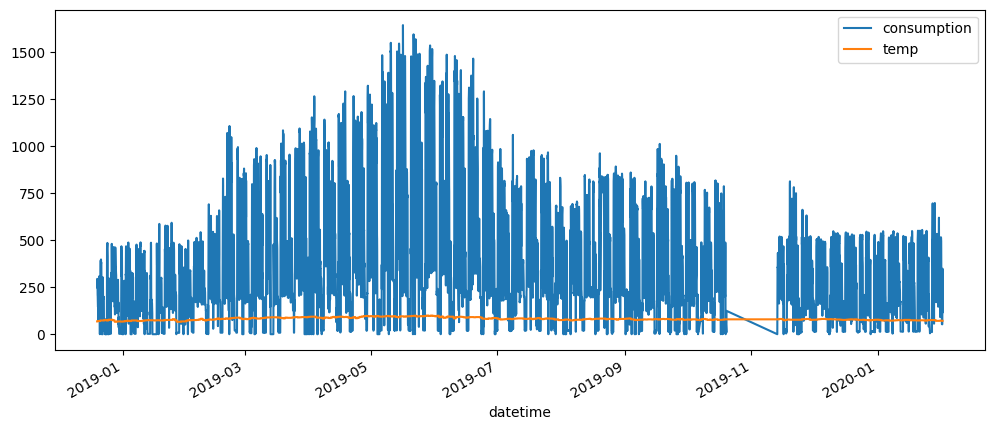

In [18]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [19]:
df.nlargest(10,'consumption')

,consumption,temp
datetime,,
2019-05-16 12:00:02,1643,96
2019-05-16 11:00:01,1620,96
2019-05-21 15:00:02,1594,98
2019-05-21 16:00:02,1583,98
2019-05-22 14:00:02,1568,99
2019-05-22 15:00:02,1568,99
2019-05-22 12:00:01,1554,99
2019-05-22 13:00:02,1551,99
2019-05-10 15:00:02,1549,96


In [20]:
df = df.reset_index()

In [21]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [22]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [23]:
df.count()

ds      9041
y       9041
temp    9041
dtype: int64

In [24]:
df.nlargest(10,'y')

,ds,y,temp
3502,2019-05-16 12:00:02,1643,96
3501,2019-05-16 11:00:01,1620,96
3625,2019-05-21 15:00:02,1594,98
3626,2019-05-21 16:00:02,1583,98
3648,2019-05-22 14:00:02,1568,99
3649,2019-05-22 15:00:02,1568,99
3646,2019-05-22 12:00:01,1554,99
3647,2019-05-22 13:00:02,1551,99
3361,2019-05-10 15:00:02,1549,96
3650,2019-05-22 16:00:01,1548,99


In [25]:
df.y = np.log(df.y)

## Model Fitting

In [26]:
model = Prophet()

In [27]:
model.fit(df)

01:18:58 - cmdstanpy - INFO - Chain [1] start processing
01:19:00 - cmdstanpy - INFO - Chain [1] done processing


## Predictions

In [28]:
prediction=model.predict(df)

In [29]:
org_prediction = prediction.copy()

In [30]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3788,2019-05-28 10:00:02,5.807248,5.531574,8.941301,5.807248,5.807248,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.287497
3789,2019-05-28 11:00:01,5.807050,5.602065,8.914658,5.807050,5.807050,1.477432,1.477432,1.477432,0.696313,0.696313,0.696313,0.781119,0.781119,0.781119,0.0,0.0,0.0,7.284483
3620,2019-05-21 10:00:02,5.802554,5.869007,8.835728,5.802554,5.802554,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.282802
3621,2019-05-21 11:00:02,5.802627,5.604357,8.811620,5.802627,5.802627,1.477407,1.477407,1.477407,0.696297,0.696297,0.696297,0.781110,0.781110,0.781110,0.0,0.0,0.0,7.280033
3452,2019-05-14 10:00:02,5.786815,5.775445,8.910965,5.786815,5.786815,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.267064
3453,2019-05-14 11:00:02,5.787071,5.698172,8.858000,5.787071,5.787071,1.477407,1.477407,1.477407,0.696297,0.696297,0.696297,0.781110,0.781110,0.781110,0.0,0.0,0.0,7.264477
3956,2019-06-04 10:00:02,5.774055,5.777558,8.710210,5.774055,5.774055,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.254304
3957,2019-06-04 11:00:03,5.773858,5.650313,8.774719,5.773858,5.773858,1.477381,1.477381,1.477381,0.696280,0.696280,0.696280,0.781101,0.781101,0.781101,0.0,0.0,0.0,7.251239
3292,2019-05-07 10:00:02,5.743890,5.659317,8.875504,5.743890,5.743890,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.224138
3293,2019-05-07 11:00:02,5.744145,5.744341,8.717061,5.744145,5.744145,1.477407,1.477407,1.477407,0.696297,0.696297,0.696297,0.781110,0.781110,0.781110,0.0,0.0,0.0,7.221552


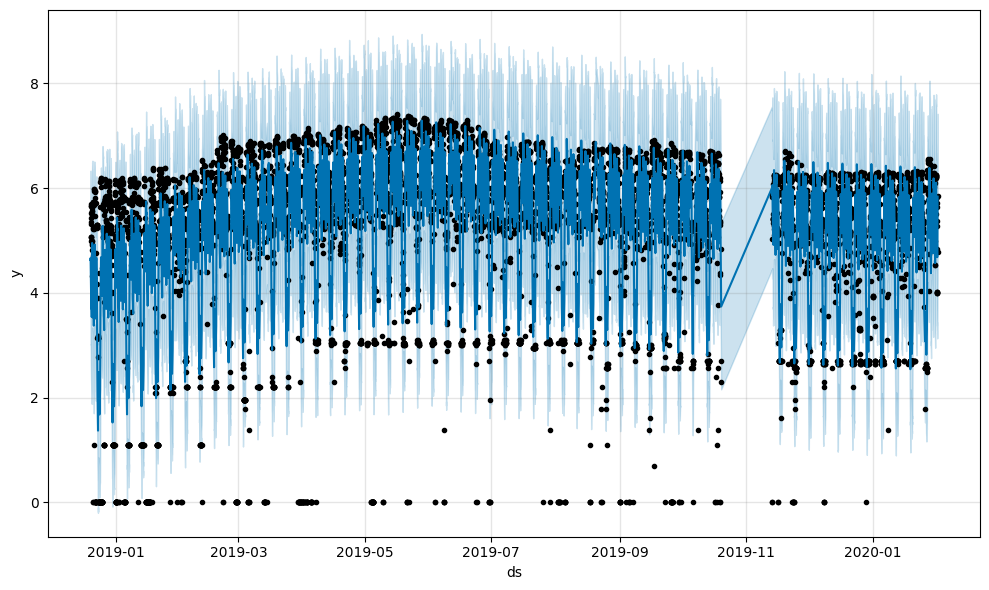

In [31]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

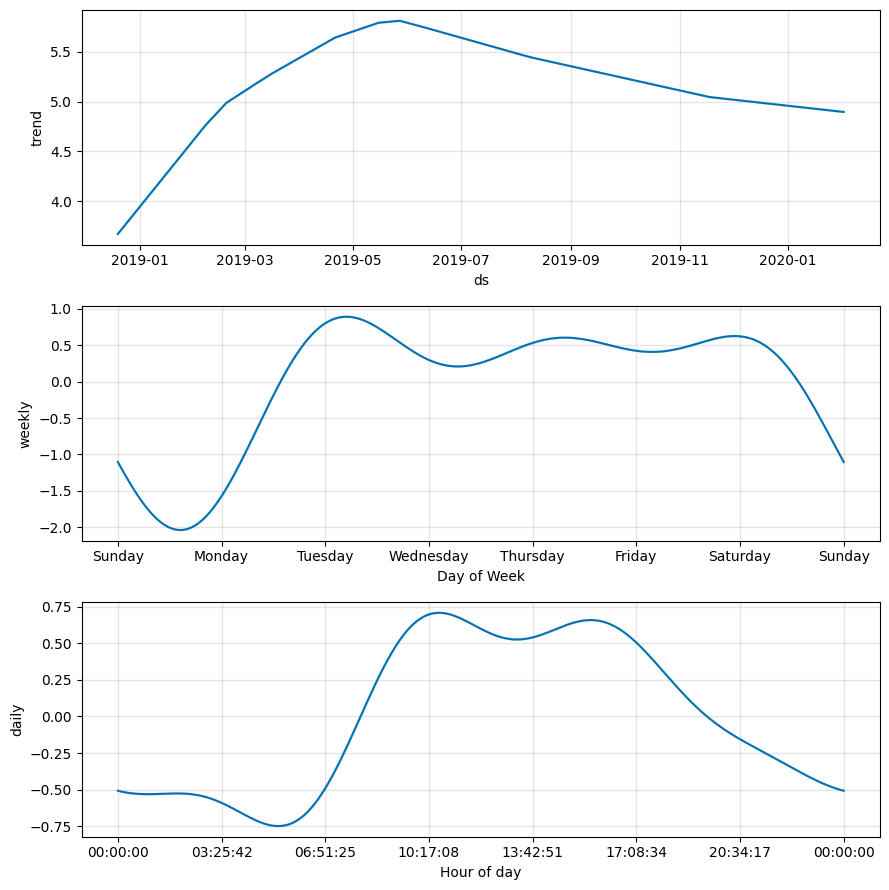

In [32]:
fig = model.plot_components(prediction)

In [33]:
df.head()

,ds,y,temp
0,2018-12-19 15:00:02,5.521461,69
1,2018-12-19 16:00:03,5.686975,69
2,2018-12-19 18:00:02,5.662960,69
3,2018-12-19 19:00:02,5.655992,69
4,2018-12-19 20:00:02,5.433722,69


In [34]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.669472,3.016638,6.177209,3.669472,3.669472,0.956740,0.956740,0.956740,0.636529,0.636529,0.636529,0.320211,0.320211,0.320211,0.0,0.0,0.0,4.626212
1,2018-12-19 16:00:03,3.670396,3.019705,6.332819,3.670396,3.670396,0.993783,0.993783,0.993783,0.649815,0.649815,0.649815,0.343968,0.343968,0.343968,0.0,0.0,0.0,4.664179
2,2018-12-19 18:00:02,3.672243,2.822817,6.053141,3.672243,3.672243,0.708886,0.708886,0.708886,0.315231,0.315231,0.315231,0.393656,0.393656,0.393656,0.0,0.0,0.0,4.381129
3,2018-12-19 19:00:02,3.673167,2.618831,5.791026,3.673167,3.673167,0.509012,0.509012,0.509012,0.090246,0.090246,0.090246,0.418766,0.418766,0.418766,0.0,0.0,0.0,4.182179
4,2018-12-19 20:00:02,3.674090,2.508765,5.716298,3.674090,3.674090,0.362152,0.362152,0.362152,-0.081359,-0.081359,-0.081359,0.443512,0.443512,0.443512,0.0,0.0,0.0,4.036243


## Errors

In [35]:
true_val = np.exp(df.y)

In [36]:
pred_val = np.exp(org_prediction['yhat'])

In [37]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

np.float64(41476.01560932356)

In [38]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

np.float64(139.26300067132226)

## Prediction

In [39]:
data = ['2019-02-25 15:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [40]:
test.ds

0    2019-02-25 15:00:00
Name: ds, dtype: object

In [41]:
val = model.predict(test)

In [42]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-25 15:00:00,5.067444,4.239734,7.580288,5.067444,5.067444,0.782142,0.782142,0.782142,0.636493,0.636493,0.636493,0.145649,0.145649,0.145649,0.0,0.0,0.0,5.849586


In [43]:
np.exp(val['yhat'])

0    347.090819
Name: yhat, dtype: float64

## Saving Model

In [49]:
type(model)

prophet.forecaster.Prophet

In [50]:
pkl_path = "C:/Users/A/Desktop/Energy-Demand-Forecasting-master/src/models/model.pkl"

In [51]:
model.stan_backend.logger = None

In [52]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [53]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [54]:
print(type(loaded_model))

<class 'prophet.forecaster.Prophet'>
